# Titanic Dataset EDA

### 환경설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 임포트 및 확인

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [10]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [47]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### 샘플링으로 데이터 살펴보기

In [ ]:
df[["sex","survived"]].groupby(["sex"]).mean().sort_values(by="survived",ascending = False)

여성의 생존율이 훨씬 높았다.

In [39]:
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159930,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


가격이 높은 등급의 좌석일수록 생존율이 높았다.

In [37]:
df.groupby('survived').mean()

,pclass,age,sibsp,parch,fare,body
survived,,,,,,
0,2.500618,30.545363,0.521632,0.328801,23.353831,160.809917
1,1.962000,28.918244,0.462000,0.476000,49.361184,NaN


In [12]:
pd.pivot_table(data=df, index=["embarked", 'pclass'], values=["survived"], aggfunc=["mean"]) 

mean
                 survived
embarked pclass          
C        1       0.687943
         2       0.571429
         3       0.366337
Q        1       0.666667
         2       0.285714
         3       0.353982
S        1       0.559322
         2       0.417355
         3       0.210101

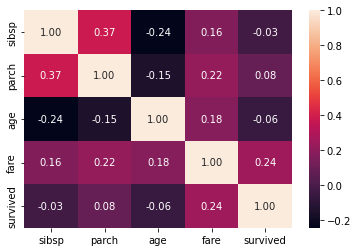

In [4]:
list1 = ["sibsp", "parch", "age", "fare", "survived"]
sns.heatmap(df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

### 데이터 시각화

<AxesSubplot:xlabel='pclass,sex'>

<Figure size 720x720 with 0 Axes>

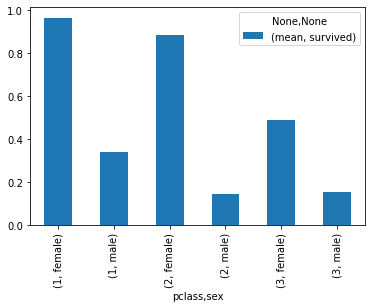

In [42]:
plt.figure(figsize=(10,10))
pv = pd.pivot_table(data=df, index=["pclass", 'sex'], values=["survived"], aggfunc=["mean"]) 
pv.plot.bar()

여성의 생존율이 월등히 높으나 3등급 좌석의 여성은 다른 등급의 여성에 비해서 생존율이 낮았다.

(array([323.,   0.,   0.,   0.,   0., 277.,   0.,   0.,   0., 709.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

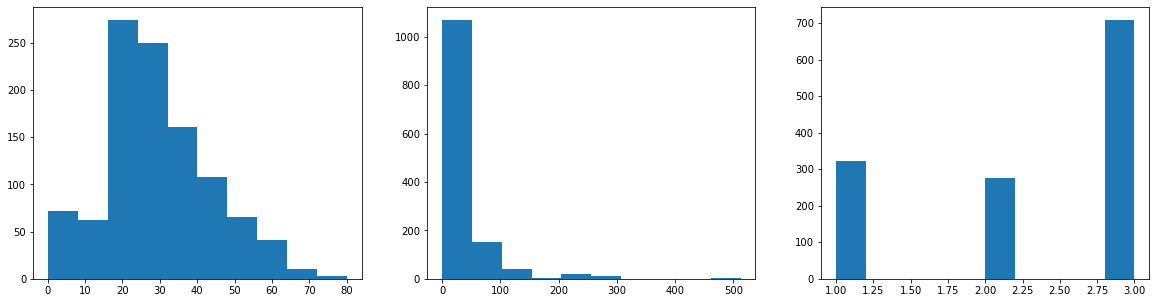

In [46]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
ax[0].hist(df.age, )
ax[1].hist(df.fare)
ax[2].hist(df.pclass)

생존율이 가장 낮았던 3등급이 탑승인원은 가장 많았다.

In [161]:
lod = pd.pivot_table(data=df, index=["pclass"],columns = ['sex'], values=['survived'], aggfunc=["mean",'sum'])
lod

mean                sum     
        survived           survived     
sex       female      male   female male
pclass                                  
1       0.965278  0.340782      139   61
2       0.886792  0.146199       94   25
3       0.490741  0.152130      106   75

생존율과 생존자 수 비교

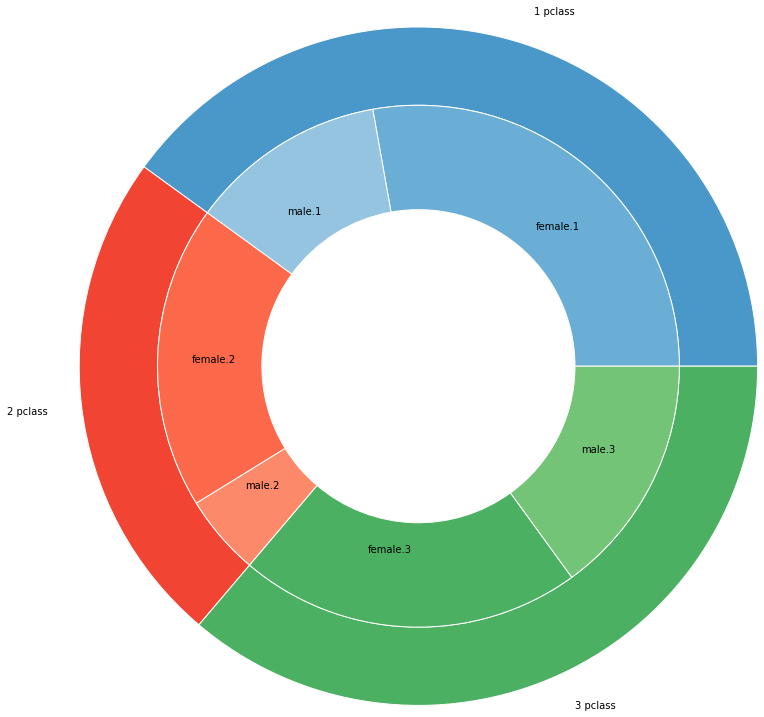

In [138]:
import matplotlib.pyplot as plt

group_names=['1 pclass', '2 pclass', '3 pclass']
group_size=[200,119,181]
subgroup_names=['female.1','male.1','female.2','male.2','female.3','male.3']
subgroup_size=[139,61,94,25,106,75]
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

fig, ax = plt.subplots(figsize=(12,12))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors= 
[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')

mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, 
labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), 
 b(0.5), b(0.4), c(0.6), c(0.5)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.show()

In [165]:
df.groupby('survived').mean()

,pclass,age,sibsp,parch,fare,body
survived,,,,,,
0,2.500618,30.545363,0.521632,0.328801,23.353831,160.809917
1,1.962000,28.918244,0.462000,0.476000,49.361184,NaN


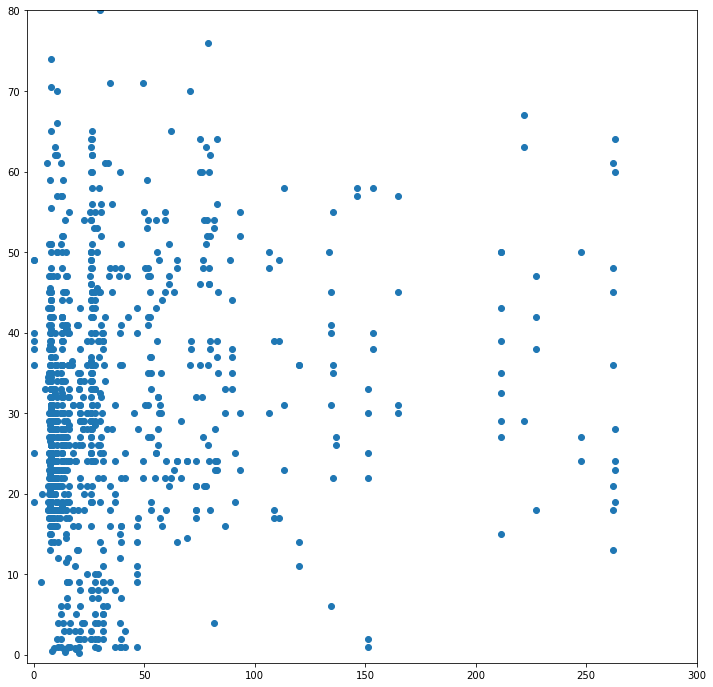

In [14]:
plt.figure(figsize=(12,12))
x = df["fare"]
y = df["age"]
plt.scatter(x,y)
plt.xlim(-3, 300)
plt.ylim(-1, 80)
plt.show()

나이와 요금의 관계는 상관이 없었다

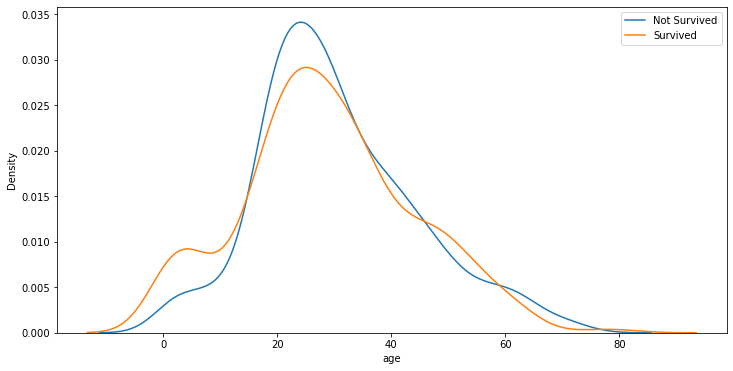

In [223]:
x = df["age"][(df["survived"] == 0) & (df["age"].notnull())]
y = df["age"][(df["survived"] == 1) & (df["age"].notnull())]
fig = plt.figure(figsize=(12,6))
sns.kdeplot(x)
sns.kdeplot(y)
plt.legend(["Not Survived","Survived"])
plt.show()

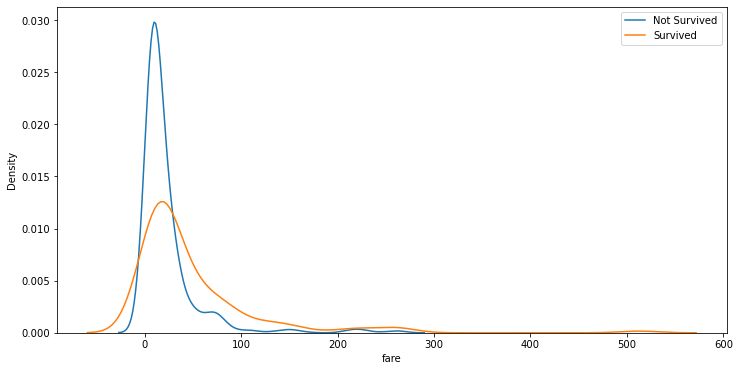

In [3]:
x = df["fare"][(df["survived"] == 0)]
y = df["fare"][(df["survived"] == 1)]
fig = plt.figure(figsize=(12,6))
sns.kdeplot(x)
sns.kdeplot(y)
plt.legend(["Not Survived","Survived"])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (809,) and (500,)

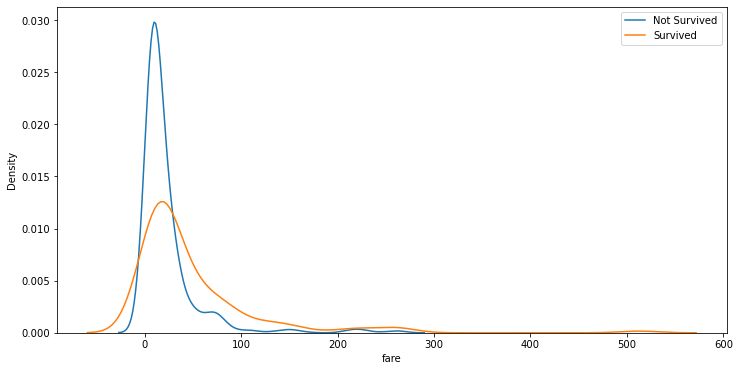

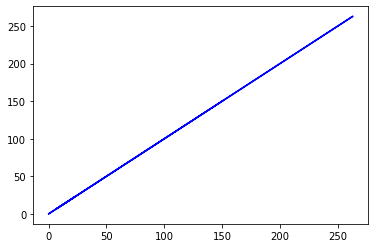

In [29]:
A = df["fare"][(df["survived"] == 0)]
B = df["fare"][(df["survived"] == 1)]

fig = plt.figure(figsize=(12,6))
sns.kdeplot(x)
sns.kdeplot(y)
plt.legend(["Not Survived","Survived"])

fig, ax = plt.subplots()

# 두 곡선을 각각 파란색, 빨간색으로 그립니다. 
ax.plot(x, A,'b')
ax.plot(x, B,'r')

intersections = []
prev_dif = 0
x0, prev_c1, prev_c2 = None, None, None
for x1, c1, c2 in zip(x, A, B):  # 현재 x좌표에 해당되는 두 곡선의 y 좌표가 각각 c1, c2입니다.
    new_dif = c2 - c1 # 현재 x 좌표에서 두 곡선의 y좌표의 차이입니다.
    if np.abs(new_dif) < 1e-12: # 현재 x 좌표에서 두 곡선의 y좌표 차이가 0인 경우입니다. 즉 두 곡선이 교차하는 지점입니다. 차이가 0인 경우로 체크하지 않고 이렇게 하는군요.
        intersections.append((x1, c1))
    elif new_dif * prev_dif < 0:  # 현재 x 좌표(x1)에서 두 곡선의 y좌표 차이가 이전 x좌표(x0)에서 계산한 두 곡선의 y좌표 차이의 부호와 다른 순간입니다. 즉 부호가 바뀌는 순간입니다. 
                                  # 즉 현재 x 좌표(x0)과 이전 x 좌표(x1)사이에 두 곡선의 교점이 있는 것을 알 수 있습니다.  
        # 현재 x 좌표(x0)과 이전 x 좌표(x1)사이에 두 곡선의 y값이 같아지는 x 좌표를 찾기 위해 선형 보간(linear interpolation)을 수행합니다.  
        # 직선 [(t0, prev_c1), (t1, c1)]과 직선 [(t0, prev_c2), (t1, c2)]의 교차점입니다. 
        denom = prev_dif - new_dif
        intersections.append(((-new_dif*x0  + prev_dif*x1) / denom, (c1*prev_c2 - c2*prev_c1) / denom))
    x0, prev_c1, prev_c2, prev_dif = x1, c1, c2, new_dif

print(intersections) # 두 곡선의 교점 리스트를 출력합니다.

ax.plot(*zip(*intersections), 'go', alpha=0.7, ms=10) # 두 곡선의 교점을 그래프에 녹색점으로 출력합니다. 
plt.show()


In [38]:
A = df["fare"][(df["survived"] == 0)]
B = df["fare"][(df["survived"] == 1)]

print(A.shape)
print(B.shape)


(809,)
(500,)


/var/folders/5m/xcyhgrds42ggf8pjt9v4bs2h0000gn/T/ipykernel_42673/3015611291.py:17: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  plt.plot(*LineString(intersection).xy, 'o')
/Users/shasha/miniforge3/envs/han/lib/python3.8/site-packages/shapely/geometry/linestring.py:46: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  ret = geos_linestring_from_py(coordinates)


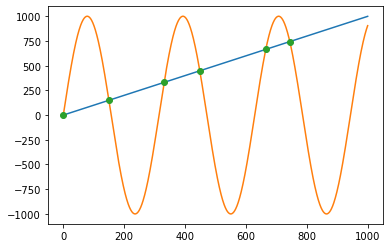

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString

x = np.arange(0, 1000)
f = np.arange(0, 1000)
g = np.sin(np.arange(0, 10, 0.01) * 2) * 1000

plt.plot(x, f)
plt.plot(x, g)

first_line = LineString(np.column_stack((x, f)))
second_line = LineString(np.column_stack((x, g)))
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')

나이와 생존유무의 Density 그래프

In [196]:
df["age"][(df["survived"] == 0) & (df["age"].notnull())]

2        2.0
3       30.0
4       25.0
7       39.0
9       71.0
        ... 
1301    45.5
1304    14.5
1306    26.5
1307    27.0
1308    29.0
Name: age, Length: 619, dtype: float64

In [11]:
pv = pd.crosstab([df.embarked, df.pclass], [df.survived], margins=False)

In [25]:
pd.crosstab([df.pclass, df.sex], [df.survived], margins=True)

survived         0    1   All
pclass sex                   
1      female    5  139   144
       male    118   61   179
2      female   12   94   106
       male    146   25   171
3      female  110  106   216
       male    418   75   493
All            809  500  1309

In [29]:
dol = pd.pivot_table(data=df, index=["pclass", 'sex'], values=["survived"], aggfunc=["count",'mean']) 

dol.columns = ["count", 'survived']

dol

count  survived
pclass sex                    
1      female    144  0.965278
       male      179  0.340782
2      female    106  0.886792
       male      171  0.146199
3      female    216  0.490741
       male      493  0.152130

<AxesSubplot:xlabel='pclass', ylabel='survived'>

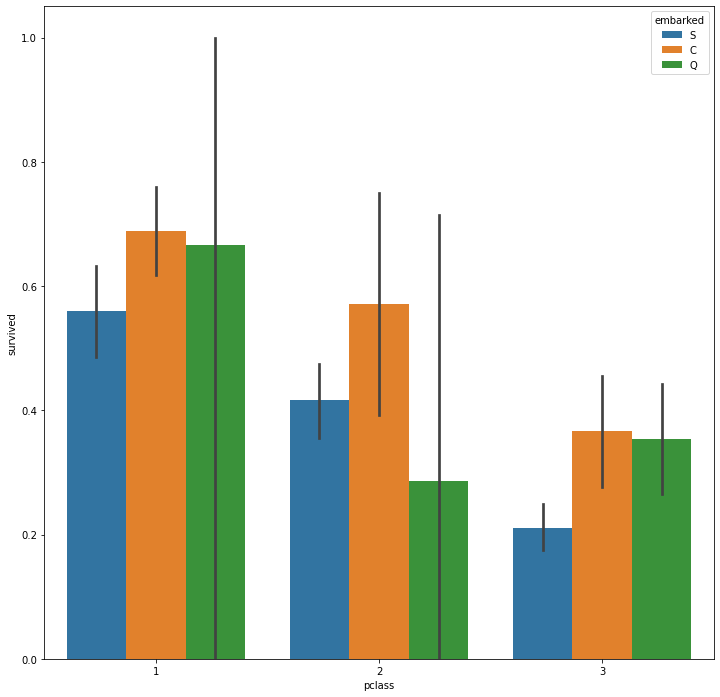

In [15]:
plt.figure(figsize = (12,12))
sns.barplot(x='pclass' , y = 'survived' , hue='embarked', data=df)

탑승 항구, 좌석 등급에 따른 생존율 비교

In [23]:
df[["parch","survived"]].groupby(["parch"], as_index=True).mean().sort_values(by="survived",ascending = False)

,survived
parch,
3,0.625000
1,0.588235
2,0.504425
0,0.335329
4,0.166667
5,0.166667
6,0.000000
9,0.000000
